## Problem:
For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

#### Data set for the Problem: Rose.csv

Please do perform the following questions on this set.
1.Read the data as an appropriate Time Series data and plot the data.

2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

3.Split the data into training and test. The test data should start in 1991.

4.Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

8.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

10.Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [1]:
#Basic Packages
import pandas as pd
import numpy as np
from pandas import datetime
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

#Visualization Package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\Acer\AppData\Local\Temp/ipykernel_14140/2403509493.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv("downloads/Sparkling.csv")
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [4]:
df.shape

(187, 2)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [7]:
df['Date']=pd.date_range(start='1980-01',end='1995-08',freq='M')
df.head()

,YearMonth,Sparkling,Date
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [8]:
df.drop(['YearMonth'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sparkling  187 non-null    int64         
 1   Date       187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [10]:
df.set_index('Date',inplace=True)
df.head()

,Sparkling
Date,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


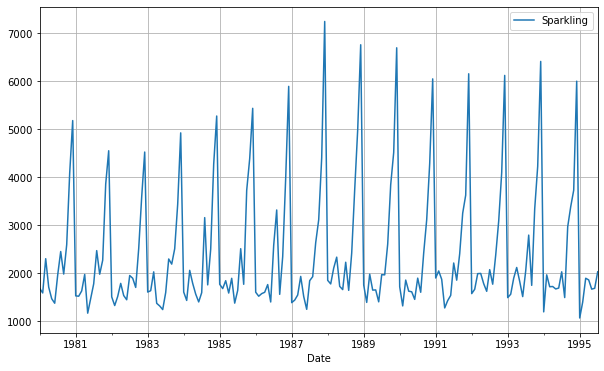

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
df.plot(grid=True);

# Q.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

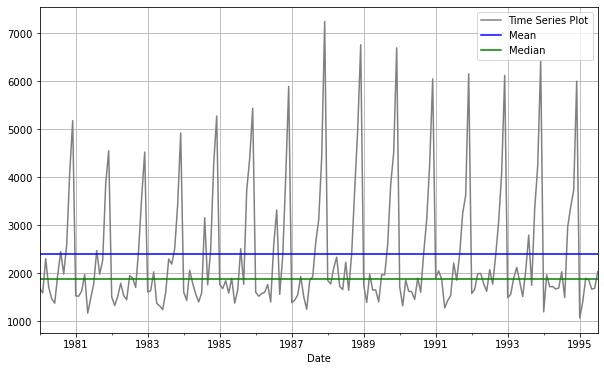

In [12]:
df.plot(color='Grey')
plt.axhline(df['Sparkling'].mean(),color='Blue')
plt.axhline(df['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

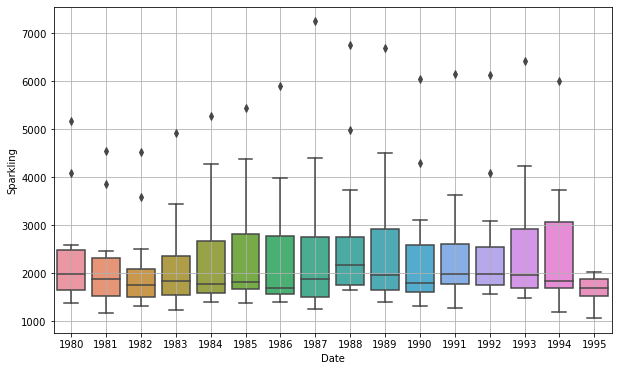

In [13]:
sns.boxplot(x=df.index.year,y=df['Sparkling'])
plt.grid();

Here, we can see that in 1988 sales are at its peak and in 1995 the sales are significantly decreased and we can also see an overall yearly trend which shows us that the sale started at a decent rate and then began to increse and then by the year 1995 it decreased.

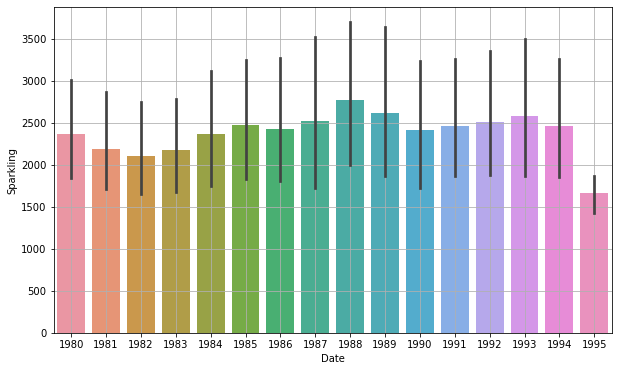

In [14]:
sns.barplot(x = df.index.year, y = df.Sparkling,data=df)
plt.grid();

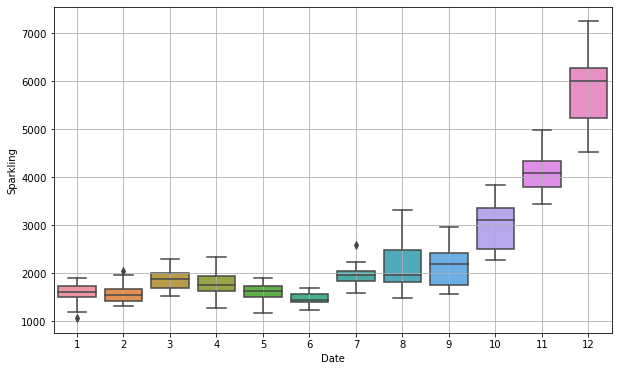

In [15]:
sns.boxplot(x=df.index.month,y=df['Sparkling'])
plt.grid();

Here we can see the sales and the trend according to month we can see that in the month of dec the sales are at its peak and a trend which can be seen increasing. In the month of jan the company didn't started well and was running low on sales but we can see decent amount of sales in the month of August and september and then from their it increased.   

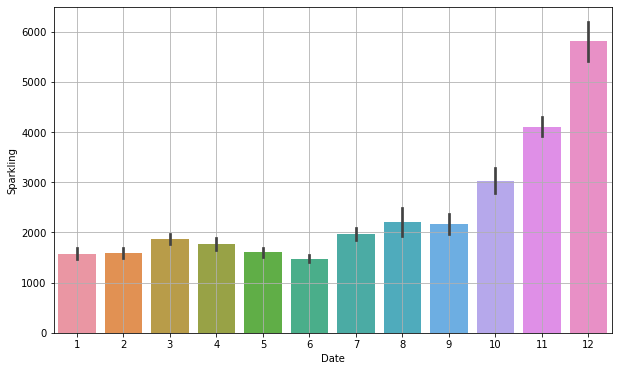

In [16]:
sns.barplot(x = df.index.month, y = df.Sparkling,data=df)
plt.grid();

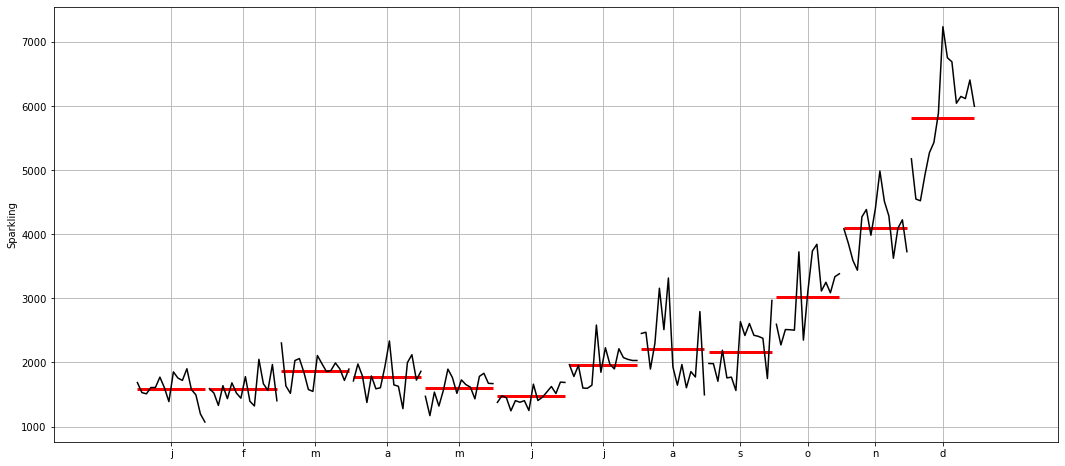

In [17]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(18,8))

month_plot(df,ylabel='Sparkling',ax=ax)
plt.grid();

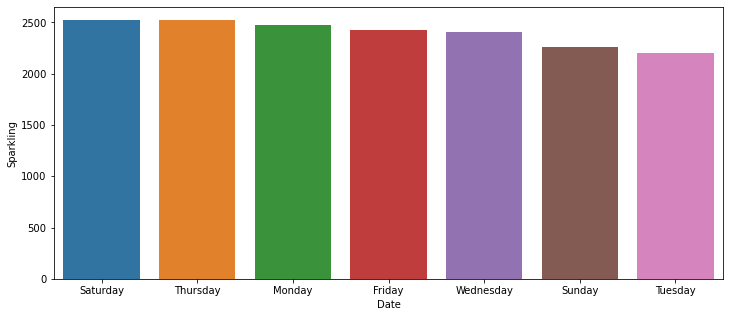

In [18]:
#Saturday registers highest average sales of beer throughout the whole week.
Tot_mean=df.groupby(df.index.day_name()).mean().reset_index()
Tot_mean=Tot_mean.sort_values(by='Sparkling',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_mean['Date'],Tot_mean['Sparkling']);

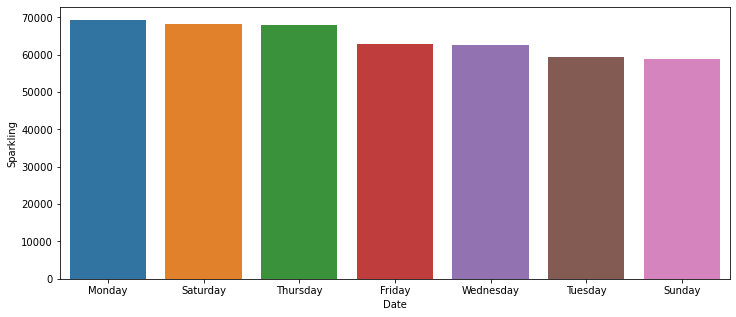

In [19]:
#Monday has the highest sales overall
Tot_sum=df.groupby(df.index.day_name()).sum().reset_index()
Tot_sum=Tot_sum.sort_values(by='Sparkling',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_sum['Date'],Tot_sum['Sparkling']);

In [20]:
#Creating PIVOT table.
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


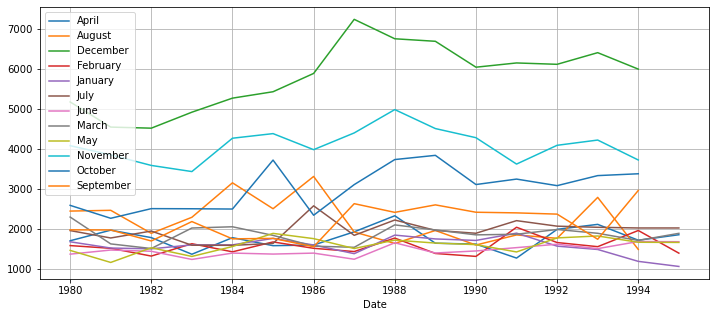

In [21]:
#Dec registers the highest amount of sales
monthly_sales_across_years.plot(figsize=(12,5))
plt.grid()
plt.legend(loc='best');

# Decompostion

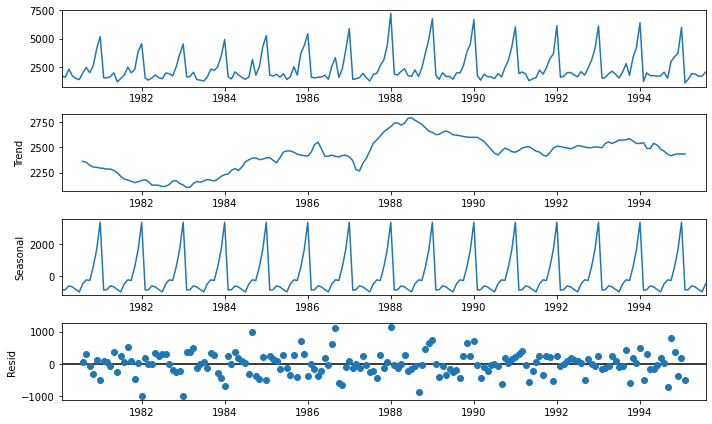

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
#As the seasonal variation is more or less constant hence we will going to choose additive model.
decompose_addition = seasonal_decompose(df,model='additive')
decompose_addition.plot();

In [23]:
trend_add = decompose_addition.trend
seasonality_add = decompose_addition.seasonal
residual_add = decompose_addition.resid

print('Trend','\n',trend_add.head(12),'\n')
print('Seasonality','\n',seasonality_add.head(12),'\n')
print('Residual','\n',residual_add.head(12),'\n')

Trend 
 Date
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
1980-11-30    1

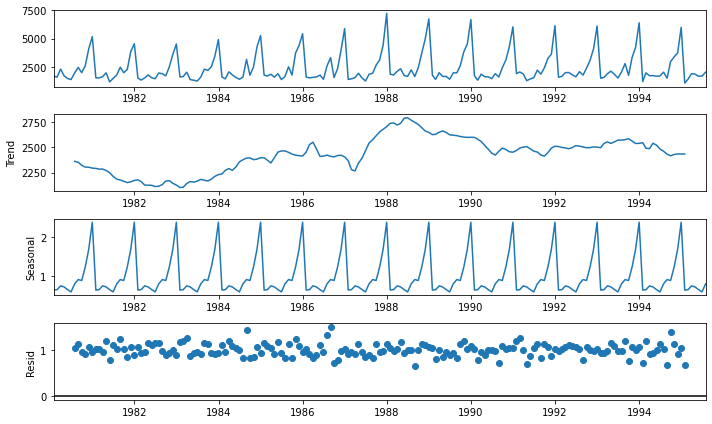

In [24]:
decompose_multi=seasonal_decompose(df,model='multiplicative')
decompose_multi.plot();

In [25]:
trend_mul = decompose_multi.trend
seasonality_mul = decompose_multi.seasonal
residual_mul = decompose_multi.resid

print('Trend','\n',trend_mul.head(12),'\n')
print('Seasonality','\n',seasonality_mul.head(12),'\n')
print('Residual','\n',residual_mul.head(12),'\n')

Trend 
 Date
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resid, dtype: float

# Q.3 Split the data into training and test. The test data should start in 1991.

In [26]:
train=df.loc['1980-01-31':'1990-12-31']
test=df.loc['1991-01-31':]

In [27]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [28]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Date,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Date,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Date,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Date,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


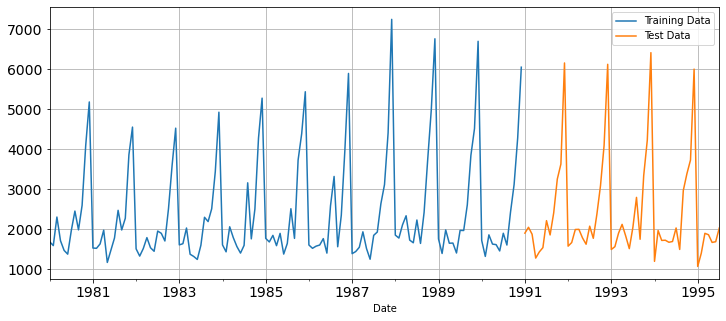

In [29]:
#Plotting Training - Testing Data
train['Sparkling'].plot(figsize=(12,5), fontsize=14)
test['Sparkling'].plot(figsize=(12,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Q.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

# Model 1: Linear Regression

In [30]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
Date,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


Last few rows of Training Data


,Sparkling,time
Date,,
1990-08-31,1605,128
1990-09-30,2424,129
1990-10-31,3116,130
1990-11-30,4286,131
1990-12-31,6047,132


First few rows of Test Data


,Sparkling,time
Date,,
1991-01-31,1902,133
1991-02-28,2049,134
1991-03-31,1874,135
1991-04-30,1279,136
1991-05-31,1432,137


Last few rows of Test Data


,Sparkling,time
Date,,
1995-03-31,1897,183
1995-04-30,1862,184
1995-05-31,1670,185
1995-06-30,1688,186
1995-07-31,2031,187


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

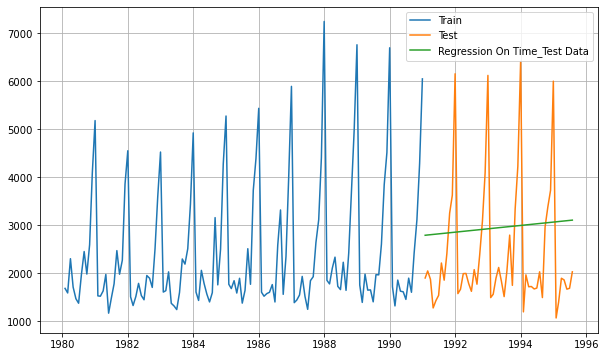

In [35]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [36]:
##### Defining the functions for calculating the accuracy metrics.
from sklearn import metrics

#### Model Evaluation

In [37]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


# Model 2: Naive Approach

In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
train.head()

,Sparkling
Date,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [41]:
test.head()

,Sparkling
Date,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


In [42]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Date
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

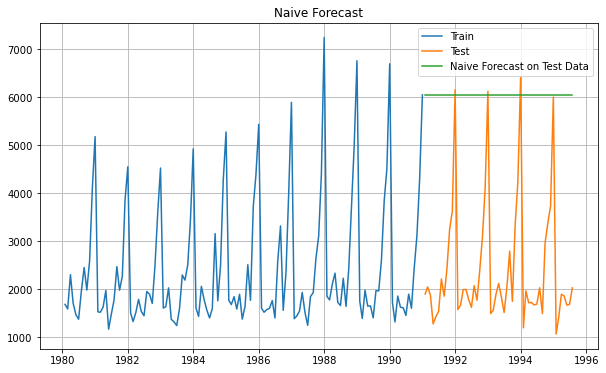

In [43]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

#### Model Evaluation

In [44]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [45]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


# Method 3: Simple Average

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Date,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


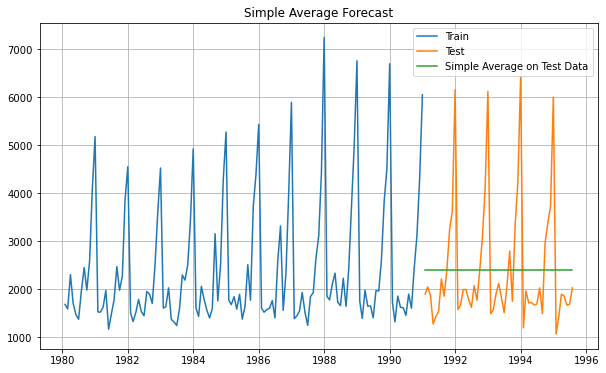

In [48]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [49]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [50]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


# Method 4: Moving Average(MA)

In [51]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Date,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


#### Trailing moving averages

In [52]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


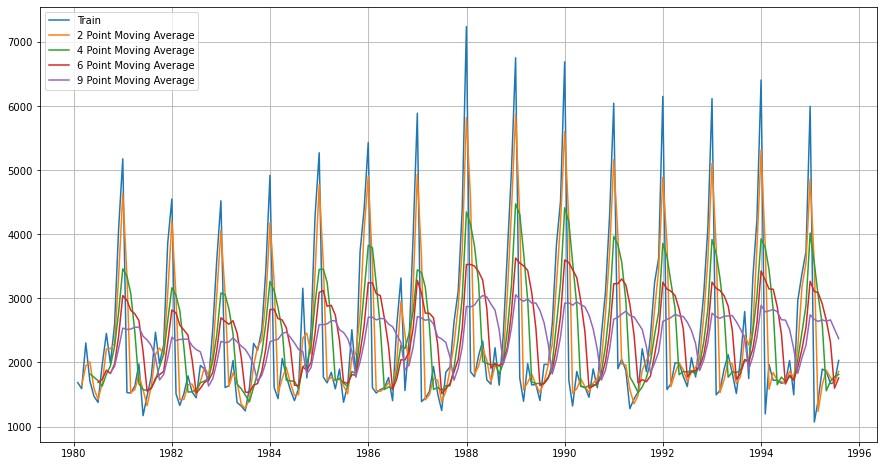

In [53]:
## Plotting on the whole data
plt.figure(figsize=(15,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [54]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

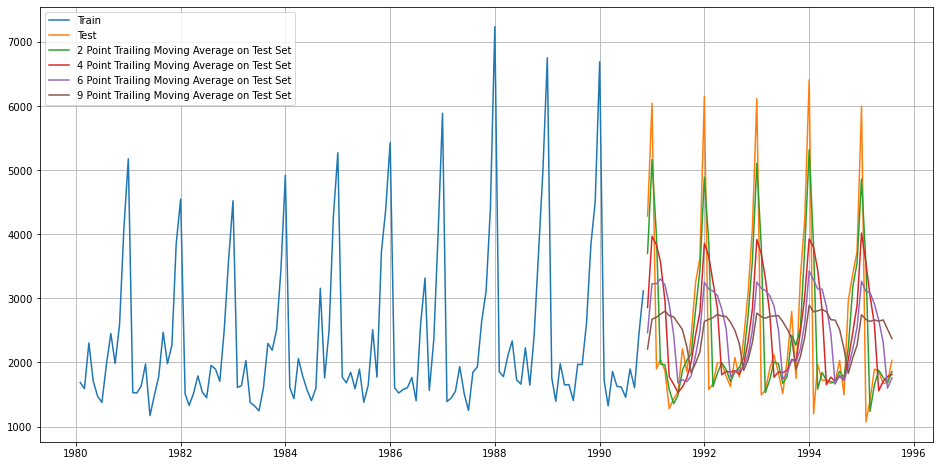

In [55]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [56]:
trailing_MovingAverage_test.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1990-11-30,4286,3701.0,2857.75,2464.500000,2209.888889
1990-12-31,6047,5166.5,3968.25,3229.500000,2675.222222
1991-01-31,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-28,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-31,1874,1961.5,2968.00,3212.333333,2800.222222


In [57]:
trailing_MovingAverage_test.shape

(57, 5)

In [58]:
test.head()

,Sparkling
Date,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


In [59]:
test.shape

(55, 1)

### Model Evaluation
Done only on the test data.

In [60]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'][2:],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'][2:],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'][2:],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'][2:],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [61]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


In [62]:
import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

### SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [63]:
SES_train = train.copy()
SES_test = test.copy()

In [64]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [65]:
model_SES_autofit = model_SES.fit(optimized=True)

In [66]:
model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict.head()

1991-01-31    2804.675124
1991-02-28    2804.675124
1991-03-31    2804.675124
1991-04-30    2804.675124
1991-05-31    2804.675124
Freq: M, dtype: float64

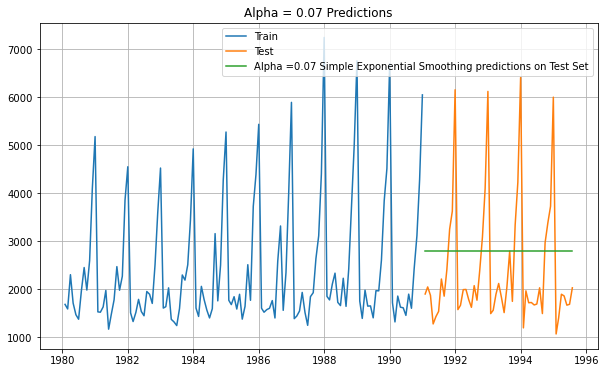

In [68]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07 Predictions');

In [69]:
from   sklearn.metrics                 import  mean_squared_error
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0083844916467
SES RMSE (calculated using statsmodels): 1338.0083844916464


In [70]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]}, index =['Alpha=0.07,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384


The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). This method is suitable for forecasting data with no clear trend or seasonal pattern. In Single ES, the forecast at time (t + 1) is given by Winters,1960

Ft+1=αYt+(1−α)Ft Parameter α is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case. SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

# Holt - ETS(A, A, N) - Holt's linear method with additive errors

# Double Exponential Smoothing

One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend. This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.

Applicable when data has Trend but no seasonality. Two separate components are considered: Level and Trend. Level is the local mean.

One smoothing parameter α corresponds to the level series A second smoothing parameter β corresponds to the trend series. Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.

Intercept or Level equation, Lt is given by: Lt=αYt+(1−α)Ft Trend equation is given by Tt=β(Lt−Lt−1)+(1−β)Tt−1 Here, α and β are the smoothing constants for level and trend, respectively,

0 <α < 1 and 0 < β < 1. The forecast at time t + 1 is given by

Ft+1=Lt+Tt Ft+n=Lt+nTt

In [71]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [72]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict.head()

1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
Freq: M, dtype: float64

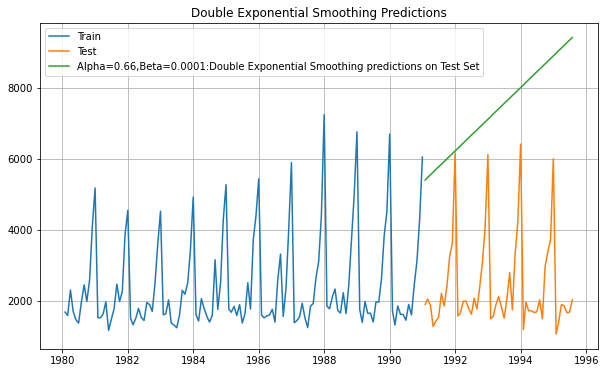

In [73]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [74]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5291.8798332269125


In [75]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384
"Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing",5291.879833


#### Inference
Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [76]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [77]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict.head()

1991-01-31    1490.402890
1991-02-28    1204.525152
1991-03-31    1688.734182
1991-04-30    1551.226125
1991-05-31    1461.197883
Freq: M, dtype: float64

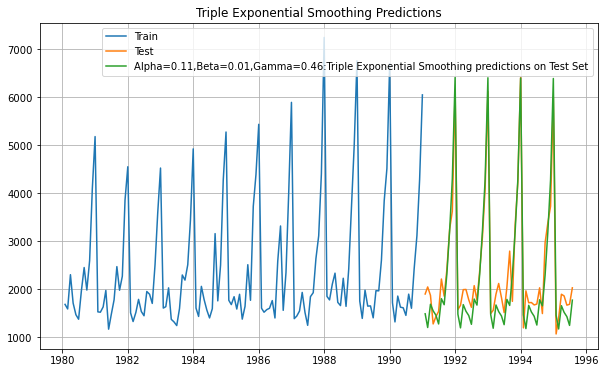

In [78]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.11,Beta=0.01,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [79]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.95102286703


In [80]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384
"Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing",5291.879833
"Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponential Smoothing",378.951023


# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [81]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [82]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am.head()

1991-01-31    1587.497468
1991-02-28    1356.394925
1991-03-31    1762.929755
1991-04-30    1656.165933
1991-05-31    1542.002730
Freq: M, dtype: float64

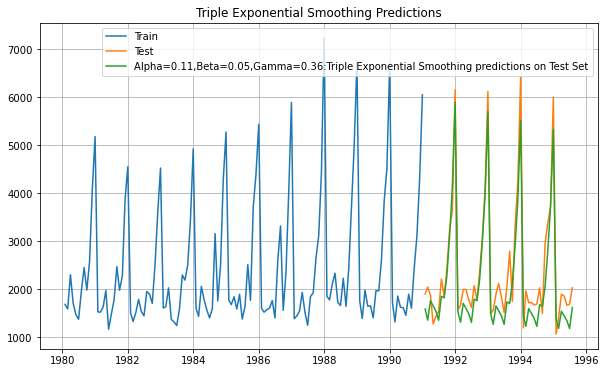

In [83]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_am, label='Alpha=0.11,Beta=0.05,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

#### Report model accuracy

In [84]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 404.286809456071


In [85]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.11,Beta=0.05,Gamma=0.36:Triple Exponential Smoothing 2'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384
"Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing",5291.879833
"Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponential Smoothing",378.951023


# Check for stationarity of the whole Time Series data.

In [86]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

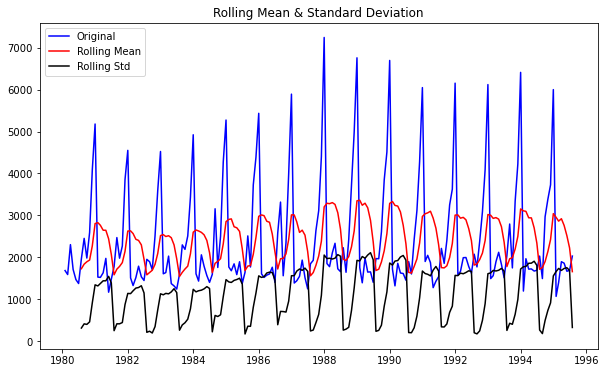

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [87]:
test_stationarity(df['Sparkling'])

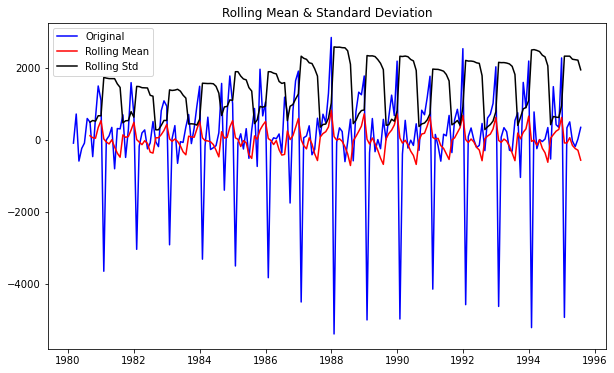

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [90]:
test_stationarity(df['Sparkling'].diff().dropna())

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

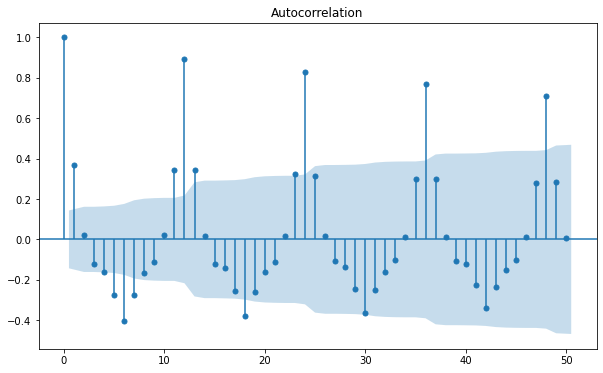

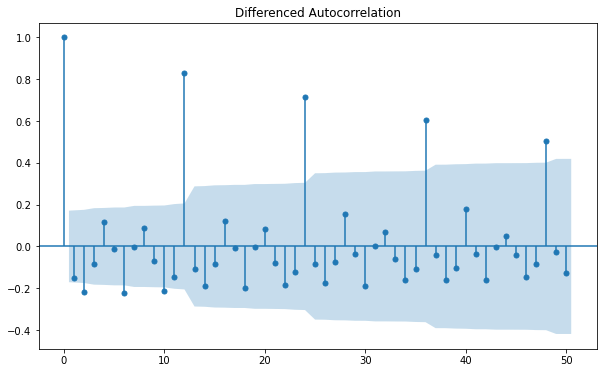

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sparkling'],lags = 50)
plot_acf(train.diff().dropna(),lags = 50,title='Differenced Autocorrelation')
plt.show();

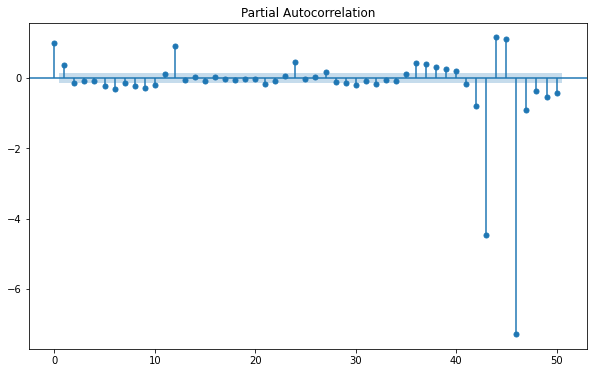

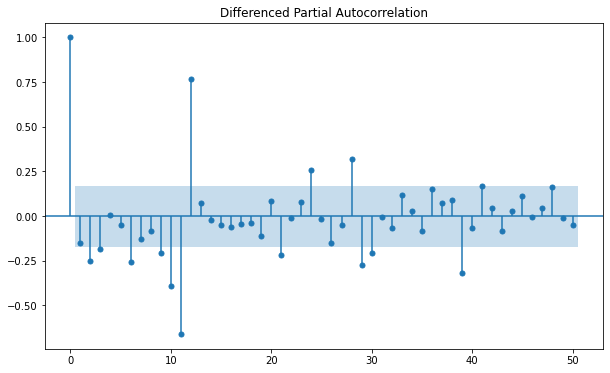

In [93]:
plot_pacf(df['Sparkling'],lags = 50)
plot_pacf(train.diff().dropna(),lags = 50,title='Differenced Partial Autocorrelation')
plt.show();

# Check for stationarity of the Training Data Time Series.

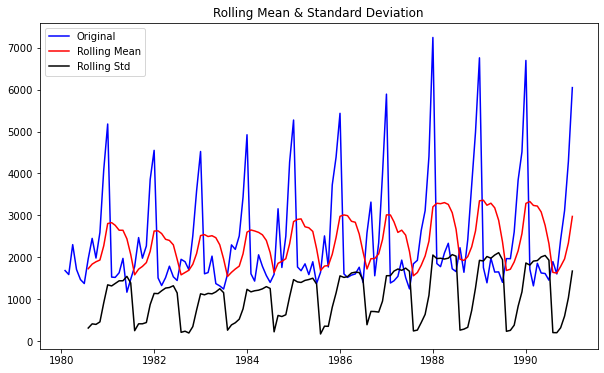

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [94]:
test_stationarity(train['Sparkling'])

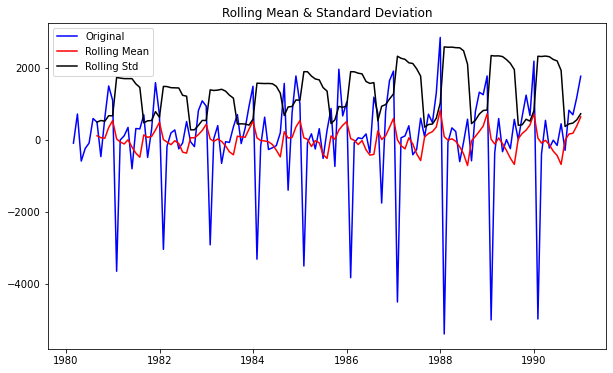

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [98]:
test_stationarity(train['Sparkling'].diff().dropna())

# Q.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [100]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [101]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [102]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(0, 1, 3) - AIC:2233.994857753515
ARIMA(0, 1, 4) - AIC:2235.173736469558
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.527200452466
ARIMA(1, 1, 3) - AIC:2235.607816390617
ARIMA(1, 1, 4) - AIC:2227.736977676672
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.509212306332
ARIMA(2, 1, 3) - AIC:2232.921136688177
ARIMA(2, 1, 4) - AIC:2222.921832384166
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498878057432
ARIMA(3, 1, 2) - AIC:2230.759636959836
ARIMA(3, 1, 3) - AIC:2221.4566102276085
ARIMA(3, 1, 4) - AIC:2219.8923646545354
ARIMA(4, 1, 0) - AIC:2259.741841399269
ARIMA(4, 1, 1) - AIC:2237.073047636303
ARIMA(4, 1, 2) - AIC:2233.049523102294
ARIMA(4, 1, 3) - AIC:2222.9040959025133
ARIMA(4, 1, 4) - AIC:2213.5641907793433


In [103]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
12,"(2, 1, 2)",2213.509212
24,"(4, 1, 4)",2213.564191
19,"(3, 1, 4)",2219.892365
18,"(3, 1, 3)",2221.456610
23,"(4, 1, 3)",2222.904096


In [104]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 25 Sep 2022   AIC                           2213.509
Time:                        12:34:57   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

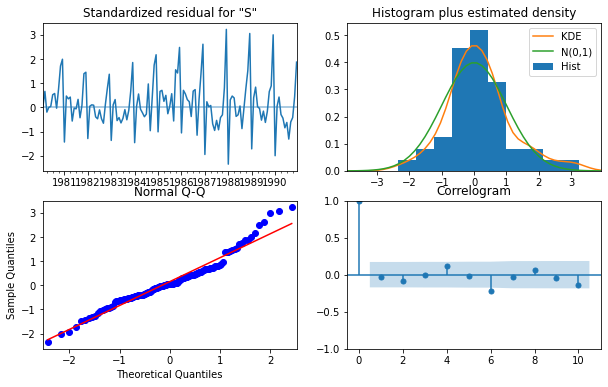

In [105]:
results_auto_ARIMA.plot_diagnostics();

# Predict on the Test Set using this model and evaluate the model.

In [106]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [107]:
test_rmse_arima = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
test_mape_arima = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',test_rmse_arima,'\nMAPE:',test_mape_arima)

RMSE: 1299.9795689481477 
MAPE: 47.099932436388684


In [108]:
resultsDf_9 = pd.DataFrame({'Test RMSE':test_rmse_arima,'MAPE':test_mape_arima}
                           ,index=['Arima 2,1,2'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384,NaN
"Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing",5291.879833,NaN
"Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponential Smoothing",378.951023,NaN


# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

## Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [109]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [110]:
SARIMA_AIC6 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC6

,param,seasonal,AIC


In [111]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC6.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536885285
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844427693
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123815902
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510798
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565727
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082825
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339541468
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135562
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274257234
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103818865
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933228848
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036718705149
SARIMA(0, 1, 2)x(0, 0, 0, 6) - 

In [112]:
SARIMA_AIC.sort_values(by=['AIC'])

,param,seasonal,AIC
0,"(2, 1, 2)","(2, 0, 2, 6)",1782.342657


In [113]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -882.171
Date:                           Sun, 25 Sep 2022   AIC                           1782.343
Time:                                   12:36:14   BIC                           1807.125
Sample:                                        0   HQIC                          1792.403
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8430      0.035    -52.843      0.000      -1.911      -1.775
ar.L2         -0.8754      0.039    -22.702

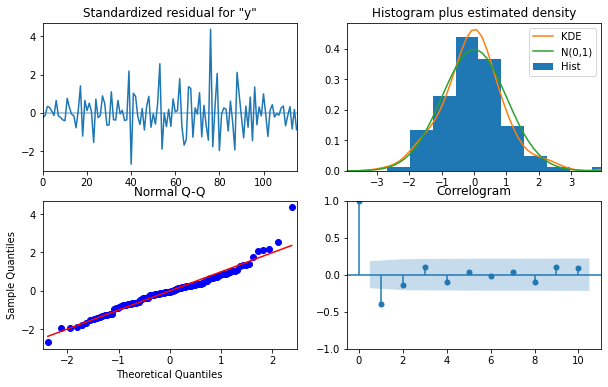

In [114]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [115]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [116]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,778.004948,469.563739,-142.323069,1698.332966
1,441.314773,703.296508,-937.121053,1819.750599
2,968.981356,848.689857,-694.420197,2632.382909
3,796.130852,993.887443,-1151.852741,2744.114445
4,667.442810,1104.575506,-1497.485401,2832.371020


In [117]:
test_rmse_sarima6 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
test_mape_sarima6 = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean)
print('RMSE:',test_rmse_sarima6,'\nMAPE:',test_mape_sarima6)

RMSE: 2117.224709406799 
MAPE: 100.28095751809441


In [118]:
resultsDf_12 = pd.DataFrame({'Test RMSE':test_rmse_sarima6,'MAPE':test_mape_sarima6}
                           ,index=['Sarima (1,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384,NaN
"Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing",5291.879833,NaN
"Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponential Smoothing",378.951023,NaN


# Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [119]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [120]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [121]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023565
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873579224
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920795
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957279854
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.150914496558
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018863517897
SARIMA(0, 1, 2)

In [122]:
SARIMA_AIC.sort_values(by=['AIC']).head()  

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934563
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121584
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340403


In [123]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 25 Sep 2022   AIC                           1555.584
Time:                                    12:37:53   BIC                           1574.095
Sample:                                01-31-1980   HQIC                          1563.083
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

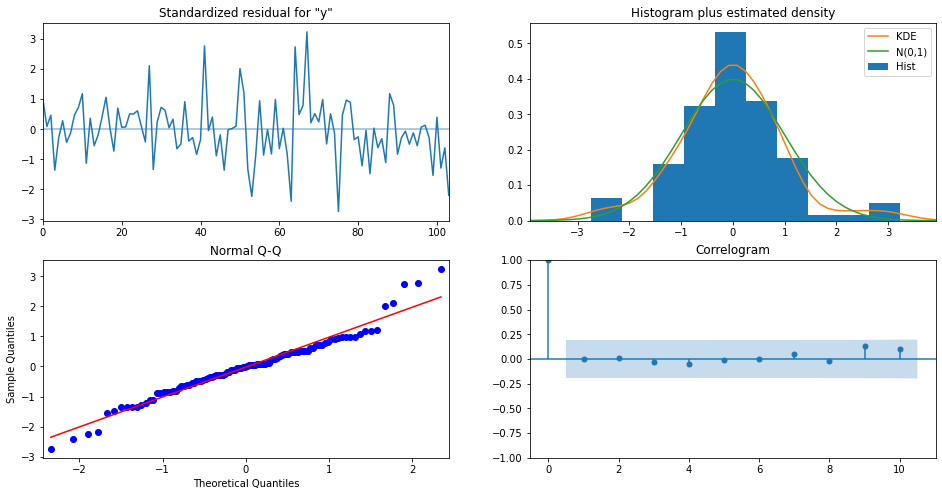

In [124]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [125]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [126]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1327.397751,388.342695,566.260054,2088.535448
1991-02-28,1315.126244,402.007271,527.206471,2103.046017
1991-03-31,1621.613165,402.000869,833.705940,2409.520389
1991-04-30,1598.878659,407.238428,800.706007,2397.051312
1991-05-31,1392.706939,407.968694,593.102993,2192.310886


In [127]:
test_rmse_sarima = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
test_mape_sarima = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',test_rmse_sarima,'\nMAPE:',test_mape_sarima)

RMSE: 528.5924497908835 
MAPE: 20.955011760201906


In [128]:
resultsDf_10 = pd.DataFrame({'Test RMSE': test_rmse_sarima,'MAPE':test_mape_sarima}
                           ,index=['SARIMA(1,1,1)(1,0,2,12)'])
resultsDf_10

,Test RMSE,MAPE
"SARIMA(1,1,1)(1,0,2,12)",528.59245,20.955012


In [129]:
resultsDf = pd.concat([resultsDf,resultsDf_10])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384,NaN
"Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing",5291.879833,NaN
"Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponential Smoothing",378.951023,NaN


# Q.7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

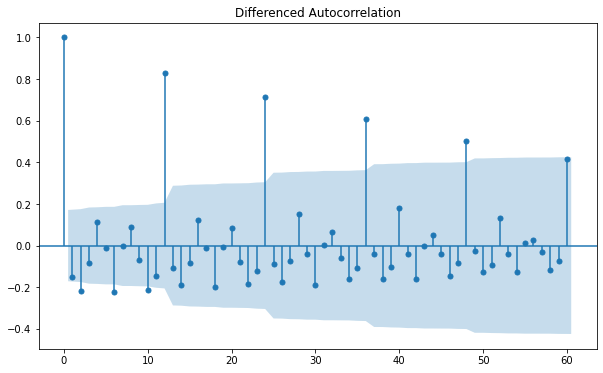

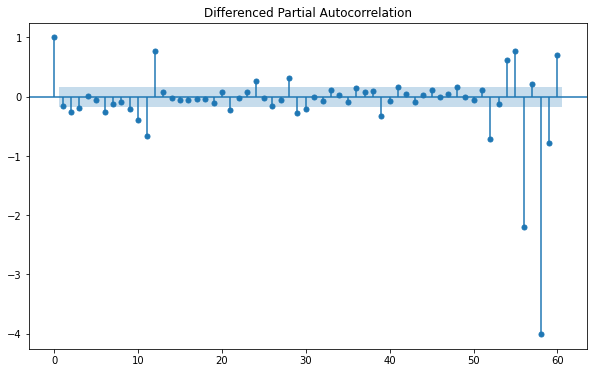

In [130]:
plot_acf(train.diff().dropna(),lags = 60,title='Differenced Autocorrelation')
plot_pacf(train.diff().dropna(),lags = 60,title='Differenced Partial Autocorrelation')
plt.show();

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p and q parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

# ARIMA MODEL

In [131]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [132]:
ARIMA_AICC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AICC

,param,AIC


In [133]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AICC = ARIMA_AICC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.527200452466
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.509212306332


In [134]:
ARIMA_AICC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095


In [135]:
auto_ARIMA_new = ARIMA(train, order=(2,0,1))

results_auto_ARIMAAA = auto_ARIMA_new.fit()

print(results_auto_ARIMAAA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1113.295
Date:                Sun, 25 Sep 2022   AIC                           2236.591
Time:                        12:37:57   BIC                           2251.005
Sample:                    01-31-1980   HQIC                          2242.448
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2399.4586    118.215     20.297      0.000    2167.762    2631.155
ar.L1          1.2375      0.138      8.938      0.000       0.966       1.509
ar.L2         -0.5293      0.124     -4.266      0.0

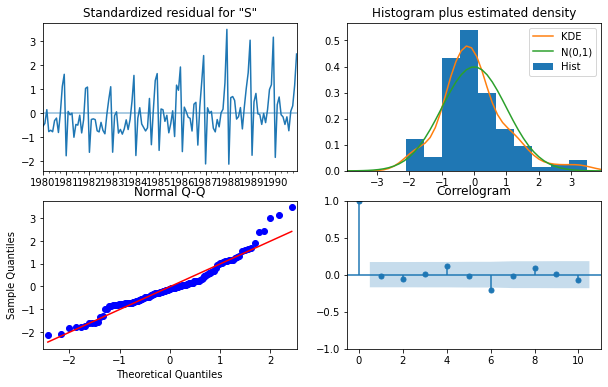

In [136]:
results_auto_ARIMAAA.plot_diagnostics();

In [137]:
predicted_auto_ARIMAAA = results_auto_ARIMAAA.forecast(steps=len(test))

In [138]:
test_rmse_arima = mean_squared_error(test['Sparkling'],predicted_auto_ARIMAAA,squared=False)
test_mape_arima = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMAAA)
print('RMSE:',test_rmse_arima,'\nMAPE:',test_mape_arima)

RMSE: 1269.3456579444457 
MAPE: 36.690218768816194


In [139]:
resultsDf_13 = pd.DataFrame({'Test RMSE':test_rmse_arima,'MAPE':test_mape_arima}
                           ,index=['Arima (2,0,1)'])
resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384,NaN
"Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing",5291.879833,NaN
"Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponential Smoothing",378.951023,NaN


# SARIMA MODEL

In [140]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 0, 1),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_neww = manual_SARIMA.fit(maxiter=1000)
print(results_SARIMA_neww.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -783.994
Date:                                 Sun, 25 Sep 2022   AIC                           1581.989
Time:                                         12:38:03   BIC                           1600.633
Sample:                                     01-31-1980   HQIC                          1589.546
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5530      0.237     -2.336      0.019      -1.017      -0

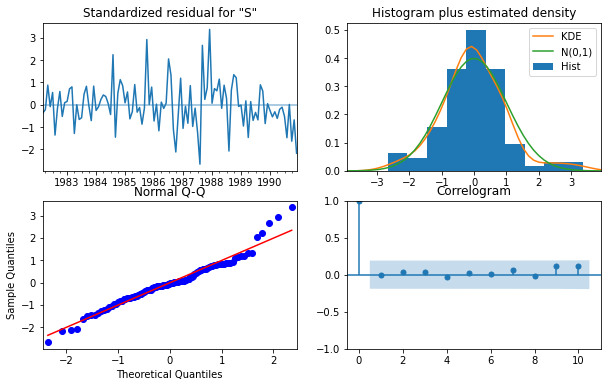

In [141]:
results_SARIMA_neww.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [142]:
predicted_manual_SARIMA2 = results_SARIMA_neww.get_forecast(steps=len(test))

In [143]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
print(rmse)

460.6098885919976


In [144]:
test_rmse_sarima_new = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
test_mape_sarima_new = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',test_rmse_sarima_new,'\nMAPE:',test_mape_sarima_new)

RMSE: 460.6098885919976 
MAPE: 15.298293300667307


In [145]:
resultsDf_11 = pd.DataFrame({'Test RMSE': test_rmse_sarima_new,'MAPE':test_mape_sarima_new}
                           ,index=['SARIMA(2, 0, 1)(1, 0, 2, 12)'])
resultsDf_11

,Test RMSE,MAPE
"SARIMA(2, 0, 1)(1, 0, 2, 12)",460.609889,15.298293


In [146]:
resultsDf = pd.concat([resultsDf,resultsDf_11])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.07,SimpleExponentialSmoothing",1338.008384,NaN
"Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing",5291.879833,NaN
"Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponential Smoothing",378.951023,NaN


# Q.8 Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [147]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['MAPE']))

Sorted by RMSE values on the Test Data: 
                                                       Test RMSE        MAPE
Alpha=0.11,Beta=0.001,Gamma=0.46:Triple Exponen...   378.951023         NaN
Alpha=0.11,Beta=0.05,Gamma=0.36:Triple Exponent...   404.286809         NaN
SARIMA(2, 0, 1)(1, 0, 2, 12)                         460.609889   15.298293
SARIMA(1,1,1)(1,0,2,12)                              528.592450   20.955012
2pointTrailingMovingAverage                          813.400684         NaN
4pointTrailingMovingAverage                         1156.589694         NaN
Arima (2,0,1)                                       1269.345658   36.690219
SimpleAverageModel                                  1275.081804         NaN
6pointTrailingMovingAverage                         1283.927428         NaN
Arima 2,1,2                                         1299.979569   47.099932
Alpha=0.07,SimpleExponentialSmoothing               1338.008384         NaN
9pointTrailingMovingAverage                   

# Q.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

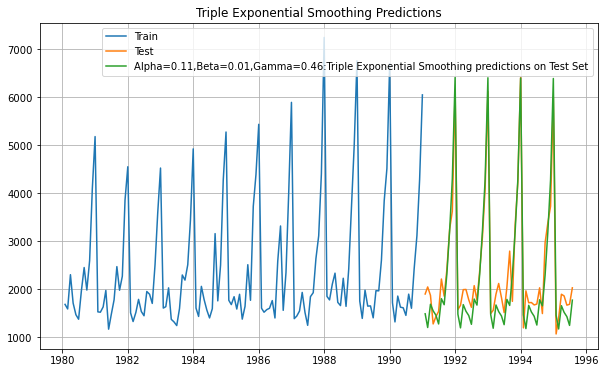

In [148]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.11,Beta=0.01,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [149]:
fullmodel1 = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='additive',freq='M').fit(
    smoothing_level=0.11,smoothing_slope=0.01,smoothing_seasonal=0.46)

In [150]:
rmse = mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 367.8420808631773


In [151]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)

In [152]:
prediction_1

1995-08-31    1852.150187
1995-09-30    2456.335190
1995-10-31    3247.505332
1995-11-30    3875.303642
1995-12-31    6104.225647
1996-01-31    1217.141787
1996-02-29    1601.821047
1996-03-31    1859.066850
1996-04-30    1841.588172
1996-05-31    1680.129986
1996-06-30    1630.752897
1996-07-31    1992.614818
Freq: M, dtype: float64

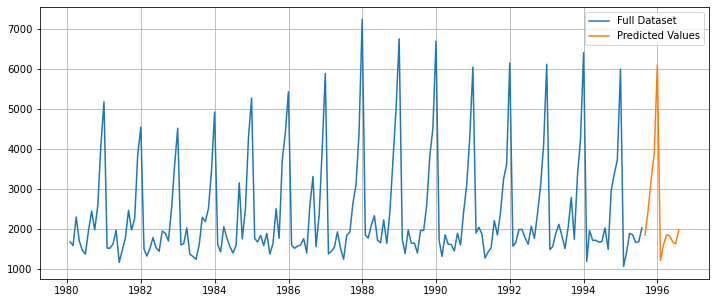

In [153]:
plt.figure(figsize=(12,5))
plt.plot(df['Sparkling'],label='Full Dataset')
plt.plot(prediction_1,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [154]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,529.221603,1852.150187,7343.422282
1995-09-30,1133.406607,2456.335190,7947.607286
1995-10-31,1924.576749,3247.505332,8738.777427
1995-11-30,2552.375059,3875.303642,9366.575738
1995-12-31,4781.297063,6104.225647,11595.497742


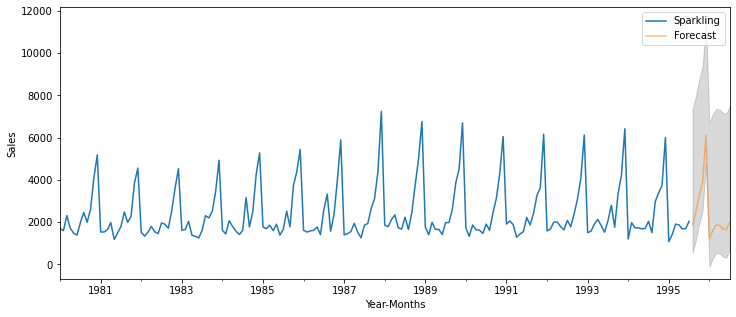

In [155]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(12,5))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

# Q.10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Here, we can see that the sale of the wine is pretty good the highest sale recorded was in 1988 after that there is a decent amount of decrease in the sales but the sales is quite constant but we in order to increase the sale we have to take certain steps

1.We can see what our competitors pricing are if our customer are buying different company's wine due to pricing.

2.we can also pay attention to our services as well what kind of services are we gibing to our customers.

3.we can go by the motto of less price but quality wine as people would love to buy good heavy wine but in less price we have to adjust according to the market running and also have to keep an eye on our competitors.

4.Wine can be a things which can be a seasonal thing as when the time of festivals comes around we tend to buy more wine so we can offer some kind of coupons or a buy 1get 1 free scheme or we can see while buying wine what other things customer tend to purchase so that we can add that item in our schemes.

5.Since it can be highly seasonal thing we have to make some kind of strategic adjustment so that we may be able to sell more wines in off season as well and we should keep our customer happy by our services and quality of wine of course with a attractive price. 
